In [1]:
import pandas as pd

# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Dropping unnecessary features
titanic_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Convert categorical features to numerical using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])

# Replace missing values with the median for numerical features
titanic_df.fillna(titanic_df.median(), inplace=True)

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived', axis=1), titanic_df['Survived'], test_size=0.2, random_state=42, stratify=titanic_df['Survived'])

What do we mean by hyperparameter tuning?

These are levers in every model which we tune to get the best performance of our model. By tuning those levers our model behave in a certain way, we have to steer our way out to get the best model possible.

Lets understand the basics of SVM parameters

**`C`**: It is a regularization parameter that controls the trade-off between achieving a low training error and a low testing error. A **small value of C creates a wider margin**, allowing more points to be misclassified, whereas a **large value of C creates a narrower margin**, resulting in fewer misclassified points. In other words, a small value of C results in a simpler model, and a large value of C results in a more complex model. The default value of C in scikit-learn is 1.0.

**`gamma`**: It is a hyperparameter that controls the shape of the decision boundary. A **small value of gamma creates a smoother decision boundary**, whereas a **large value of gamma creates a more complex and wiggly decision boundary**. In other words, a small value of gamma results in a model that is underfitting, and a large value of gamma results in a model that is overfitting. The default value of gamma in scikit-learn is 'scale', which is equivalent to 1 / (n_features * X.var()).

**`kernel`**: It is a function that maps the input data into a higher-dimensional space, where it can be more easily separated by a linear classifier. SVMs can use different types of kernel functions, such as linear, polynomial, sigmoid, and radial basis function (RBF). The kernel hyperparameter in SVC class determines which kernel function to use for the model. The default kernel is the RBF kernel, which is often used for non-linear classification problems.

If you want to explore more https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769#:~:text=the%20training%20data-,C,classifying%20the%20training%20points%20correctly.&text=Increasing%20C%20values%20may%20lead%20to%20overfitting%20the%20training%20data.

Lets understand **`GridSearchCV`**

In GridSearchCV, cross-validation is used to estimate the performance of each combination of hyperparameters that are being evaluated in the grid search. The basic idea is to divide the available data into k subsets, or "folds", of roughly equal size. Then, for each combination of hyperparameters, the model is trained on k-1 folds of the data and evaluated on the remaining fold. This process is repeated k times, with each fold being used exactly once as the validation data.

Before we move to code, lets look into **`Cross-validation`**

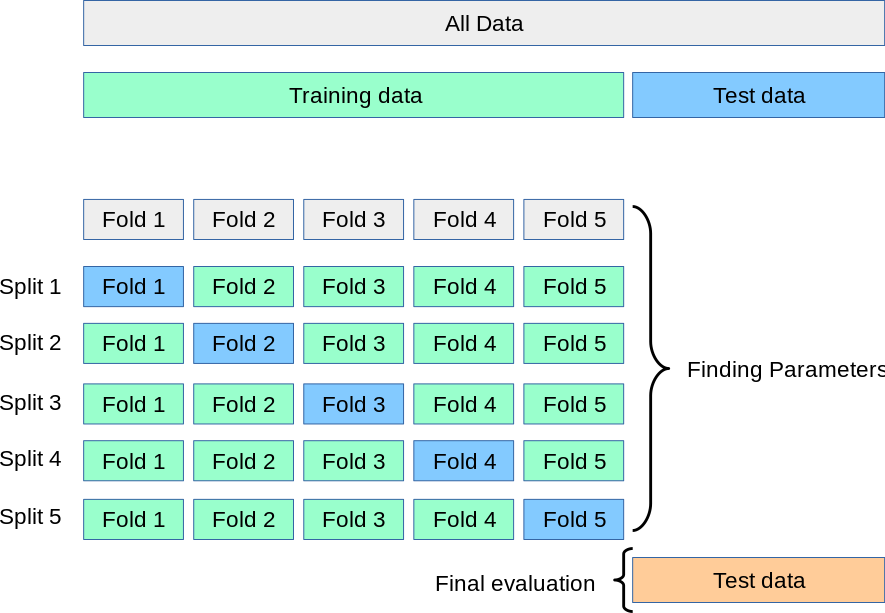

In [13]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

svc = svm.SVC(probability=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svc, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=100, gamma=0.001)

In [16]:
# Train the model with the best hyperparameters
best_model = svm.SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel=grid_search.best_params_['kernel'], probability=True)
best_model.fit(X_train, y_train)

SVC(C=100, gamma=0.001, probability=True)

In [14]:
svc = svm.SVC(probability=True)

svc.fit(X_train, y_train)

SVC(probability=True)

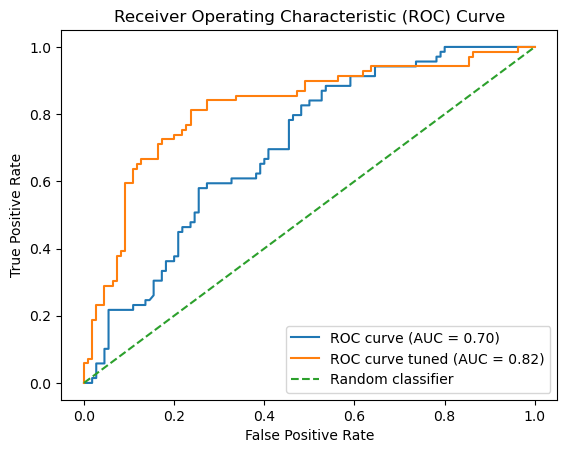

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred = svc.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')

y_pred = best_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve tuned (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import accuracy_score

def check_overfitting(X_train, X_test, y_train, y_test, model):
    print("Printing scores for {}".format(str(model)))
    y_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    print("Train accuracy {}%".format(train_acc*100))
    
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print("Test accuracy {}%".format(test_acc*100), "\n")

check_overfitting(X_train, X_test, y_train, y_test, svc)
check_overfitting(X_train, X_test, y_train, y_test, best_model)

Printing scores for SVC(probability=True)
Train accuracy 70.36516853932584%
Test accuracy 62.01117318435754% 

Printing scores for SVC(C=100, gamma=0.001, probability=True)
Train accuracy 84.12921348314607%
Test accuracy 78.2122905027933% 

